In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [21]:
# glob.glob() returns all filepaths that match the given pattern
files = glob.glob("states*")
df_list = []
for filename in files:
  data = pd.read_csv(filename)
  df_list.append(data)
# concatenate the data into a single DataFrame named us_census
us_census = pd.concat(df_list)

#examine the data
print(us_census.head())
print("\n")
print(us_census.columns)
print("\n")
print(us_census.dtypes)
print("\n")

   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific       Income            GenderPop  
0  3.25%   0.04%  $59,125.27       510388M_543273F  
1  1.25%   0.05%  $46,296.81     2322409M_2455167F  
2  1.02%   0.04%  $51,805.41       423477M_419713F  
3  1.41%   0.04%  $47,328.08     3167756M_3331859F  
4  3.67%   0.07%  $55,874.52   13171316M_13367298F  


Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')


Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic 

In [22]:
# remove dollar signs and commas from the data in the 'Income' column
us_census.Income = us_census['Income'].replace('[\$,]', '', regex=True)
print(us_census.Income.head())

0    59125.27 
1    46296.81 
2    51805.41 
3    47328.08 
4    55874.52 
Name: Income, dtype: object


In [23]:
# split the 'GenderPop' column into two columns, 'Men' and 'Women'
splitGenderPop = us_census['GenderPop'].str.split('_', expand=True)
us_census['Men'] = splitGenderPop[0].values
us_census['Women'] = splitGenderPop[1].values

# drop the 'GenderPop' column: 
us_census = us_census.drop(columns='GenderPop')
print(us_census.head())



   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%   
4           4           Texas  26538614   38.05%  44.69%  11.65%  0.26%   

   Asian Pacific     Income        Men      Women  
0  3.25%   0.04%  59125.27     510388M    543273F  
1  1.25%   0.05%  46296.81    2322409M   2455167F  
2  1.02%   0.04%  51805.41     423477M    419713F  
3  1.41%   0.04%  47328.08    3167756M   3331859F  
4  3.67%   0.07%  55874.52   13171316M  13367298F  


In [24]:
# remove the 'M' and 'W' characters from the 'Men' and 'Women' columns:
us_census.Men = us_census["Men"].replace('\D', '', regex=True)
us_census.Women = us_census["Women"].replace('\D', '', regex=True)

us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,0,Rhode Island,1053661,13.36%,74.33%,5.68%,0.35%,3.25%,0.04%,59125.27,510388,543273
1,1,South Carolina,4777576,5.06%,62.89%,28.75%,0.29%,1.25%,0.05%,46296.81,2322409,2455167
2,2,South Dakota,843190,3.24%,82.50%,1.42%,9.42%,1.02%,0.04%,51805.41,423477,419713
3,3,Tennessee,6499615,4.72%,73.49%,18.28%,0.23%,1.41%,0.04%,47328.08,3167756,3331859
4,4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316,13367298


In [25]:
# make the data in the 'Men' and 'Women' columns numeric:
us_census.Men = pd.to_numeric(us_census.Men)
us_census.Women = pd.to_numeric(us_census.Women)
us_census.dtypes

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic       object
White          object
Black          object
Native         object
Asian          object
Pacific        object
Income         object
Men             int64
Women         float64
dtype: object

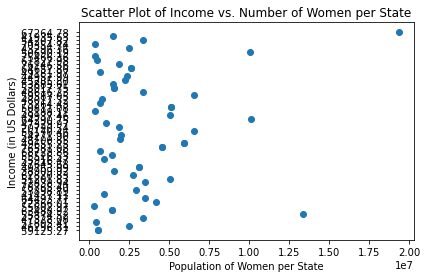

<Figure size 432x288 with 0 Axes>

In [26]:
# use matplotlib.pyplot to make a scatter plot of income versus population of women per state
plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()

In [27]:
# examine the data in the Women column:
print(us_census.Women)
# it has some NaN's that need to be turned into numbers.

0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0           NaN
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1           NaN
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5           NaN
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
Name: Women, dtype: float64


In [28]:
# change the NaN values to be the total population for the state minus the pop of men for that state:
us_census = us_census.fillna(value={"Women":us_census.TotalPop - us_census.Men})
print(us_census.Women)

0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
Name: Women, dtype: float64


In [29]:
# check data for duplicate rows
#ignore the 1st column because it's irrelevant and could make rows look different when they're actually duplicates.
us_census.duplicated(subset = us_census.columns[1:])

# drop the duplicate rows, again ignoring the first column:
us_census = us_census.drop_duplicates(subset = us_census.columns[1:])

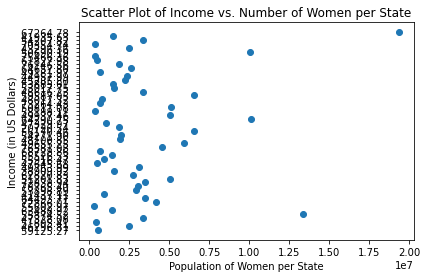

<Figure size 432x288 with 0 Axes>

In [30]:
# remake the previous scatterplot now that the duplicates have been removed:
plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Scatter Plot of Income vs. Number of Women per State")
plt.xlabel("Population of Women per State")
plt.ylabel("Income (in US Dollars)")
plt.show()
plt.clf()

In [31]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')

In [45]:
# remove percent signs and change data type to numeric for columns
cols_to_change = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
for col in cols_to_change:
    us_census[col] = us_census[col].replace('%', '', regex=True)
    us_census[col] = pd.to_numeric(us_census[col])

#change data type for 'Income' column to numeric
us_census['Income'] = pd.to_numeric(us_census['Income'])   
us_census.dtypes    

Unnamed: 0      int64
State          object
TotalPop        int64
Hispanic      float64
White         float64
Black         float64
Native        float64
Asian         float64
Pacific       float64
Income        float64
Men             int64
Women         float64
dtype: object

In [46]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,Men,Women
0,0,Rhode Island,1053661,13.36,74.33,5.68,0.35,3.25,0.04,59125.27,510388,543273.0
1,1,South Carolina,4777576,5.06,62.89,28.75,0.29,1.25,0.05,46296.81,2322409,2455167.0
2,2,South Dakota,843190,3.24,82.50,1.42,9.42,1.02,0.04,51805.41,423477,419713.0
3,3,Tennessee,6499615,4.72,73.49,18.28,0.23,1.41,0.04,47328.08,3167756,3331859.0
4,4,Texas,26538614,38.05,44.69,11.65,0.26,3.67,0.07,55874.52,13171316,13367298.0


In [47]:
# check if there are any NaN values in us_census DataFrame:
us_census.isnull().values.any()

True

In [52]:
# see which columns have null values
us_census.isnull().sum()

Unnamed: 0    0
State         0
TotalPop      0
Hispanic      0
White         0
Black         0
Native        0
Asian         0
Pacific       4
Income        0
Men           0
Women         0
dtype: int64

In [59]:
# Fill the missing values in the "Pacific" column with 100 minus all the other categories
us_census['Pacific'] = us_census['Pacific'].fillna(100 - us_census['Hispanic'] - us_census['White'] - us_census['Black'] - us_census['Native'] - us_census['Asian'])

# check if that got rid of all the null values in us_census
us_census.isnull().values.any()


False

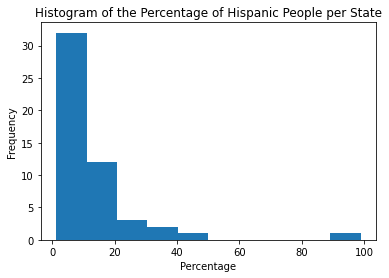

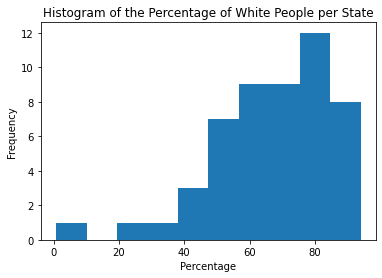

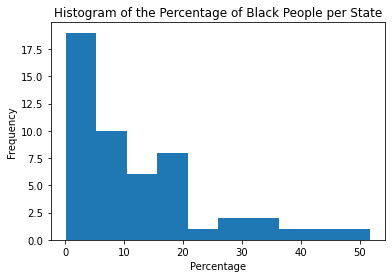

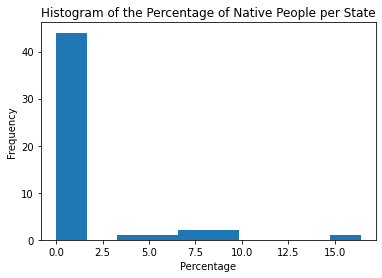

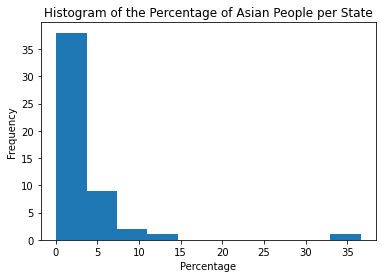

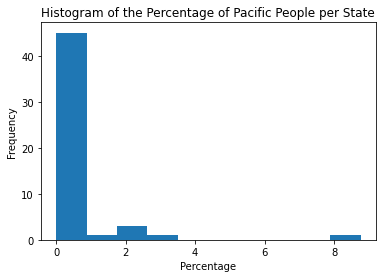

<Figure size 432x288 with 0 Axes>

In [63]:
for category in ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']:
    plt.hist(us_census[category])
    plt.title("Histogram of the Percentage of {} People per State".format(category))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()
    plt.clf()